In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

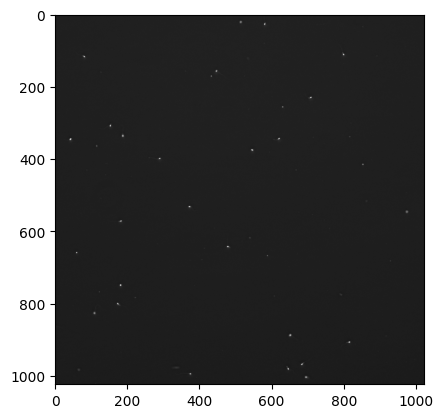

In [2]:
videofile1 = "ExampleVideos/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"

# Visualize the input
cap1 = cv2.VideoCapture(videofile1)

# Get the first frame
ret, frame = cap1.read()

plt.imshow(frame)

### Feed through the tracking pipeline

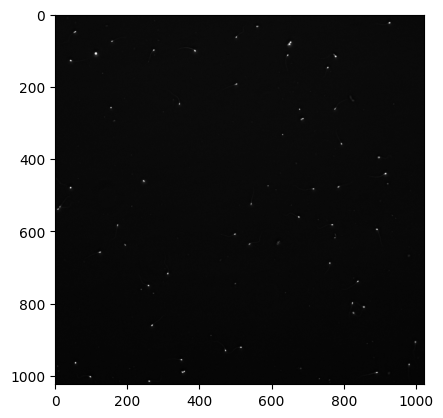

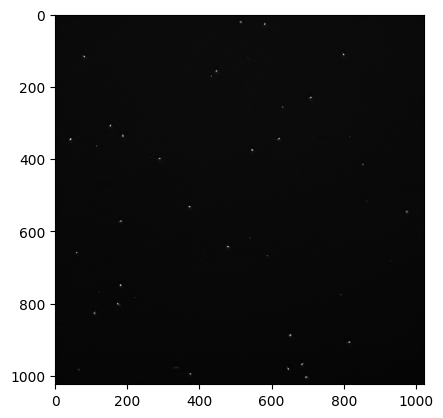

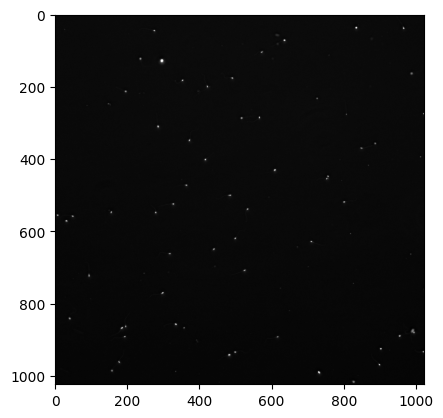

In [3]:
importlib.reload(tracker)
importlib.reload(utils)

videofile1 = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1.mp4"
videofile2 = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1.mp4"
videofile3 = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1.mp4"

frames1 = utils.loadVideo(videofile1,as_gray=True)
frames2 = utils.loadVideo(videofile2,as_gray=True)
frames3 = utils.loadVideo(videofile3,as_gray=True)

plt.imshow(frames1[0], cmap='gray'); plt.show()
plt.imshow(frames2[0], cmap='gray'); plt.show()
plt.imshow(frames3[0], cmap='gray'); plt.show()

# Adjustment for this case
frames3 = frames3[:len(frames1)]

# Verify that the frames are all the same size
if frames1[0].shape == frames2[0].shape == frames3[0].shape:
    pass
else:
    print(f"Shape of frames in video 1: {frames1[0].shape}")
    print(f"Shape of frames in video 2: {frames2[0].shape}")
    print(f"Shape of frames in video 3: {frames3[0].shape}")
    raise ValueError("Frames from the videos do not have the same dimensions.")
if len(frames1) == len(frames2) == len(frames3):
    pass
else:
    print(f"Frames in video 1: {len(frames1)}")
    print(f"Frames in video 2: {len(frames2)}")
    print(f"Frames in video 3: {len(frames3)}")
    raise ValueError("Frames from the videos do not have the same number of frames.")

In [4]:
# Load all three videos csv files
csvfile1 = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P016an R1_corrected.csv"
csvfile2 = "Comparisons/10X Ph- 9Fps Wash Dil 1 16 P017me R1_corrected.csv"
csvfile3 = "Comparisons/10X Ph- 9Fps Wash 1 16 P018cu R1_corrected.csv"

df1 = utils.loadDataFrame(csvfile1)
df2 = utils.loadDataFrame(csvfile2)
df3 = utils.loadDataFrame(csvfile3)

# Adjustment for this example
df3 = df3[df3['frame'] < len(frames1)]

# Clean dataframes
df1 = utils.dropDuplicates(df1)
df2 = utils.dropDuplicates(df2)
df3 = utils.dropDuplicates(df3)

df1 = utils.interpolateTracks(df1)
df2 = utils.interpolateTracks(df2)
df3 = utils.interpolateTracks(df3)

In [5]:
# Visualize before processing

importlib.reload(visualizer)

visualizer.runVisualization(videofile1, df1, visualization="flow")
visualizer.runVisualization(videofile2, df2, visualization="flow")
visualizer.runVisualization(videofile3, df3, visualization="flow")

(109, 3)
Video Finished.
(52, 3)
Video Finished.
(94, 3)
Video Finished.


In [6]:
# Combine videos into single video using max
frames1_np = np.array(frames1)
frames2_np = np.array(frames2)
frames3_np = np.array(frames3)
combined_frames = np.maximum(np.maximum(frames1_np, frames2_np), frames3_np)

print(combined_frames.shape)

# Create a new video file from the combined frames
output_video_file = "combined_video.mp4"
utils.saveVideo(combined_frames,output_video_file, fps=9)

(264, 1024, 1024)


In [7]:
import pandas as pd

# Copy each dataframe to ensure they are not modified in place
df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

# Combine the dataframes into a single dataframe, making sure sperm identifiers are unique
max_sperm_id1 = df1_c['sperm'].max() if not df1_c.empty else 0
df2_c['sperm'] += max_sperm_id1 + 1
max_sperm_id2 = df2_c['sperm'].max() if not df2_c.empty else 0
df3_c['sperm'] += max_sperm_id2 + 1

# Combine the dataframes
combined_df = pd.concat([df1_c, df2_c, df3_c], ignore_index=True)

# Save the combined dataframe to a CSV file
output_csv_file = "combined_tracks.csv"
utils.saveDataFrame(combined_df, output_csv_file)


In [8]:
# Visualize the combined dataframe
visualizer.runVisualization(output_video_file, combined_df, visualization="flow")

(255, 3)
Video Finished.


In [ ]:
# Start combining rotations and mirrors of videos
frames1_np = np.array(frames1)
frames2_np = np.array(frames2)
frames3_np = np.array(frames3)
frames1_r = np.rot90(frames1_np, axes=(2, 1))  # Rotate 90 degrees (in image space)
frames2_r = np.rot90(frames2_np, axes=(2, 1))
frames3_r = np.rot90(frames3_np, axes=(2, 1))
frames1_mirrorh = np.flip(frames1_np, axis=2)  # Mirror horizontally
frames2_mirrorh = np.flip(frames2_np, axis=2)  # Mirror horizontally
frames3_mirrorh = np.flip(frames3_np, axis=2)  # Mirror horizontally
frames1_mr = np.rot90(np.copy(frames1_mirrorh), axes=(2, 1))
frames2_mr = np.rot90(np.copy(frames2_mirrorh), axes=(2, 1))
frames3_mr = np.rot90(np.copy(frames3_mirrorh), axes=(2, 1))
#frames1_mirrorv = np.flip(frames1_np, axis=1)  # Mirror vertically
#frames2_mirrorv = np.flip(frames2_np, axis=1)  # Mirror vertically
#frames3_mirrorv = np.flip(frames3_np, axis=1)  # Mirror vertically
combined_frames = np.stack(
        (frames1_np, frames2_np, frames3_np,
        frames1_r, frames2_r, frames3_r,
        #frames1_mirrorh, frames2_mirrorh, frames3_mirrorh,
        #frames1_mirrorv, frames2_mirrorv, frames3_mirrorv,
        frames1_mr, frames2_mr, frames3_mr,
        ), axis=0
        ).max(axis=0)


print(combined_frames.shape)

# Create a new video file from the combined frames
output_video_file = "combined_video_augmented.mp4"
utils.saveVideo(combined_frames,output_video_file, fps=9)

(264, 1024, 1024)


In [39]:
import pandas as pd

# Copy each dataframe to ensure they are not modified in place
df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

print(df3_c["x"].min(), df3_c["y"].min())
print(df3_c["x"].max(), df3_c["y"].max())

# Apply each augmentation to the dataframes
def rotate90DF(df, center_x=511.5, center_y=511.5):
    df['x'], df['y'] = -(df['y'] - center_y) + center_x, (df['x'] - center_x) + center_y
    return df

def mirrorDF(df, axis='horizontal', center_x=511.5, center_y=511.5):
    if axis == 'horizontal':
        df['x'] = 2*center_x - df['x']
    elif axis == 'vertical':
        df['y'] = 2*center_y - df['y']
    return df

def combineSpermDF(df_list):

    # Make a new list that is a copy of all the dataframes
    df_list_c = [df.copy() for df in df_list if not df.empty]

    #Combine the dataframes into a single dataframe, making sure sperm identifiers are unique
    max_sperm_id = []
    for i, df in enumerate(df_list_c):
        if not df.empty:
            max_sperm_id.append(df['sperm'].max() if not df.empty else 0)

    for i, df in enumerate(df_list_c):
        if not df.empty:
            df['sperm'] += sum(max_sperm_id[:i]) + i + 1

    combined = pd.concat(df_list_c, ignore_index=True)
    return combined

df1_r = rotate90DF(df1_c.copy())
df2_r = rotate90DF(df2_c.copy())
df3_r = rotate90DF(df3_c.copy())
#df1_mirrorh = mirrorDF(df1_c.copy(), 'horizontal')
#df2_mirrorh = mirrorDF(df2_c.copy(), 'horizontal')
#df3_mirrorh = mirrorDF(df3_c.copy(), 'horizontal')
df1_mr = rotate90DF(mirrorDF(df1_c.copy(), 'horizontal'))
df2_mr = rotate90DF(mirrorDF(df2_c.copy(), 'horizontal'))
df3_mr = rotate90DF(mirrorDF(df3_c.copy(), 'horizontal'))

combined_df = combineSpermDF([df1_c, df2_c, df3_c,
                             df1_r, df2_r, df3_r,
                             #df1_mirrorh, df2_mirrorh, df3_mirrorh,
                             df1_mr, df2_mr, df3_mr
                             ])

print("Max sperm IDs after augmentation:", combined_df['sperm'].max())

# # Save the combined dataframe to a CSV file
output_csv_file = "combined_tracks_augmented.csv"
utils.saveDataFrame(combined_df, output_csv_file)

2.6405919661733614 2.800811176205498
1021.0 1021.0
Max sperm IDs after augmentation: 765


In [63]:
importlib.reload(visualizer)

# Visualize the combined dataframe
visualizer.runVisualization(output_video_file, combined_df, visualization="flow")

(766, 3)
Video Finished.
